In [1]:
# Test similarity map - might have to add folder to PYTHONPATH first

In [2]:
from pathlib import Path
import sys

sys.path.append('/home/labhhc2/Documents/workspace/D20/Ngoc/scscore')

In [3]:
from scscore.standalone_model_numpy import SCScorer

In [4]:
scscorer = SCScorer()    
scscorer.restore()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xef in position 2: ordinal not in range(128)

In [8]:
from scscore.standalone_model_numpy import SCScorer
scscorer = SCScorer()    
scscorer.restore()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xef in position 2: ordinal not in range(128)

In [18]:
from rdkit.Chem.Draw import SimilarityMaps
import rdkit.Chem as Chem

getfp = lambda m, a: SimilarityMaps.GetMorganFingerprint(m, atomId=a, nBits=1024, useChirality=True)
getscore = lambda fp: scscorer.apply(fp)

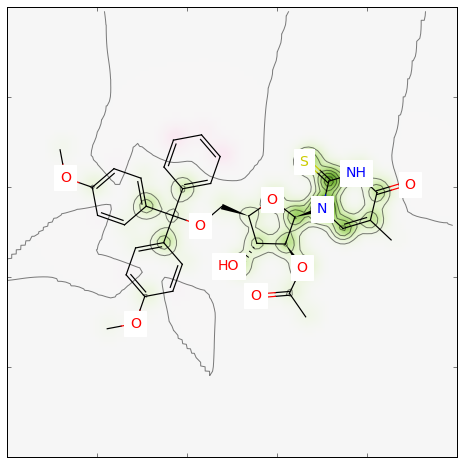

In [31]:
mol = Chem.MolFromSmiles('COc1ccc(C(OC[C@H]2O[C@@H](n3cc(C)c(=O)[nH]c3=S)[C@@H](OC(C)=O)[C@@H]2O)(c2ccccc2)c2ccc(OC)cc2)cc1')
fig, maxweight = SimilarityMaps.GetSimilarityMapForModel(mol, getfp, getscore)
fig

In [113]:
import json
from pathlib import Path
import os
import sys
root_dir = Path('/home/labhhc2/Documents/workspace/D20/Ngoc/scscore/notebooks/show_similarity_maps.ipynb').resolve().parents[1]
print(root_dir)
# Add the root directory to the system path
sys.path.append(str(root_dir))
os.chdir(root_dir)
max=0
with open('./data/fw_data.json.gz','rb') as f:
    data=json.load(f)



/home/labhhc2/Documents/workspace/D20/Ngoc/scscore


In [116]:
data[2]

{'R-id': 24541,
 'class': [2],
 'reactions': 'CN(C)CCN.[O-][n+]1nc(Cl)nc2ccc3c(c21)CCCO3>>CN(C)CCNc1nc2ccc3c(c2[n+]([O-])n1)CCCO3.Cl',
 'positive_reactions': 'CN(C)CCN.[O-][n+]1nc(Cl)nc2ccc3c(c21)CCCO3>>CN(C)CCNc1nc2ccc3c(c2[n+]([O-])n1)CCCO3.Cl',
 'negative_reactions': None}

In [98]:
dct={'a':{1:'b'}}
dct['a']['aa%s'%(str(1))]='c'

dct['rea']={}

{'a': {1: 'b', 'aa1': 'c'}}

In [89]:
a=[]
b={'b':1}
c={'c':2}
a.append(b)
a.append(c)
type(a)


list

In [73]:
len(idx_chosen)

33621

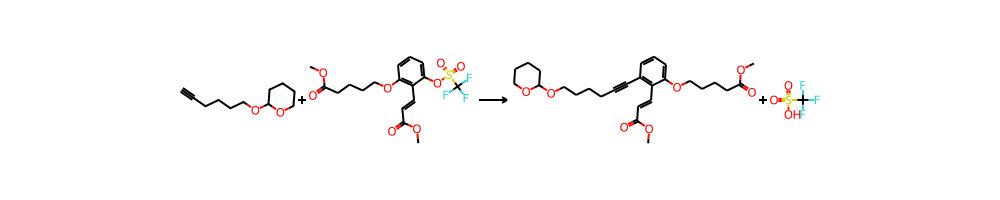

In [60]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smi=data[19978]['reactions']
reaction=AllChem.ReactionFromSmarts(smi,useSmiles=True)
Draw.ReactionToImage(reaction)

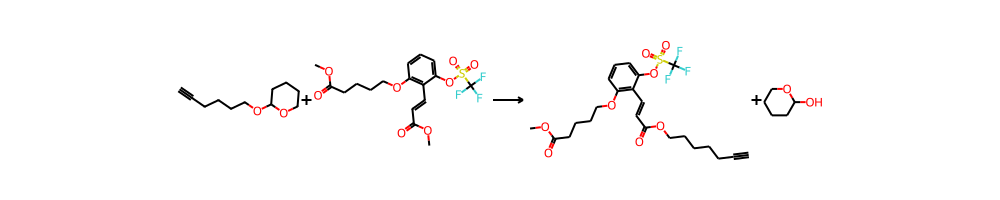

In [64]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smi=data[19978]['negative_reactions'][2]
reaction=AllChem.ReactionFromSmarts(smi,useSmiles=True)
Draw.ReactionToImage(reaction)

In [52]:
len(data[10]['negative_reactions'])

4

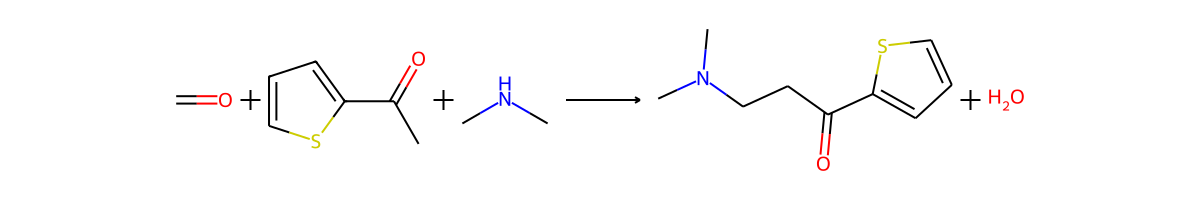

In [35]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smi=data[10]['reactions']
reaction=AllChem.ReactionFromSmarts(smi,useSmiles=True)
Draw.ReactionToImage(reaction)

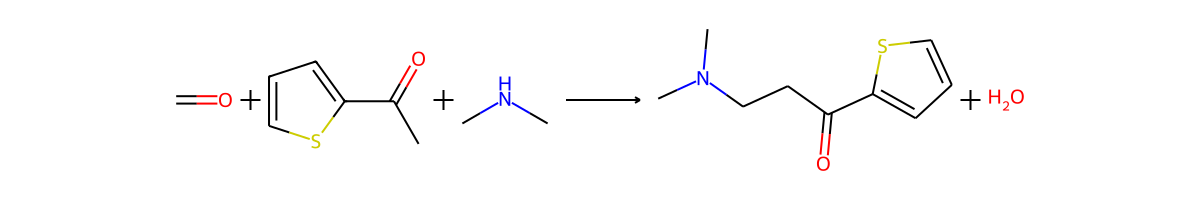

In [36]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smi=data[10]['positive_reactions']
reaction=AllChem.ReactionFromSmarts(smi,useSmiles=True)
Draw.ReactionToImage(reaction)

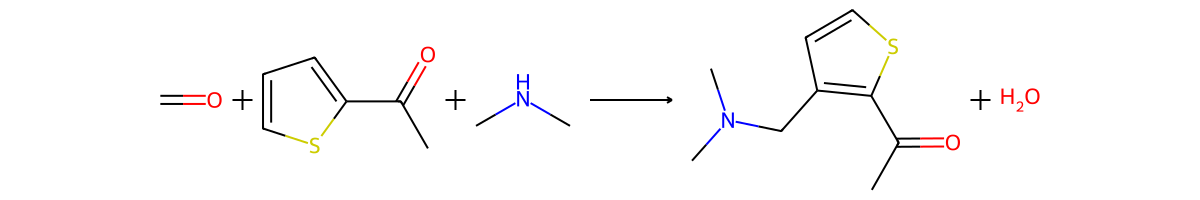

In [39]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smi=data[10]['negative_reactions'][2]
reaction=AllChem.ReactionFromSmarts(smi,useSmiles=True)
Draw.ReactionToImage(reaction)

In [2]:
import pandas as pd
df=pd.read_csv('/home/labhhc2/Documents/workspace/D20/Ngoc/scscore/data/alo123.csv')
df.head()

,Unnamed: 0,Reaction_smiles,Product_smiles,Decoy_smiles,SCScore_Product,SCScore_Decoy
0,0,CC(C)(C)OC(=O)N1CCNCC1.O=S(=O)(c1ccccc1)N1CCOc...,CC(C)(C)OC(=O)N1CCN(c2cc(Cl)cc3c2OCCN3S(=O)(=O...,CC(C)(C)OC(=O)N1CCN(c2cc(Cl)cc3c2OCCN3S(=O)(=O...,3.183093,3.183093
1,1,BrCc1ccc(Br)cc1.COCCO>>Br.COCCOCc1ccc(Br)cc1,COCCOCc1ccc(Br)cc1,COCCOCc1ccc(Br)cc1,1.423568,1.423568
2,2,CN(C)CCN.[O-][n+]1nc(Cl)nc2ccc3c(c21)CCCO3>>CN...,CN(C)CCNc1nc2ccc3c(c2[n+]([O-])n1)CCCO3,CN(C)CCNc1nc2ccc3c(c2[n+]([O-])n1)CCCO3,4.123520,4.123520
3,3,COc1ccccc1-c1nc(C2CC(C)(C)OC(C)(C)C2)c[nH]1.N#...,COc1ccccc1-c1nc(C2CC(C)(C)OC(C)(C)C2)cn1Cc1ccc...,COc1ccccc1-c1nc(C2CC(C)(C)OC(C)(C)C2)cn1Cc1ccc...,3.923480,3.923480
4,4,CC(C)O.O=C(Cl)OCCl>>CC(C)OC(=O)OCCl.Cl,CC(C)OC(=O)OCCl,CC(C)OC(=O)OCCl,1.540484,1.540484


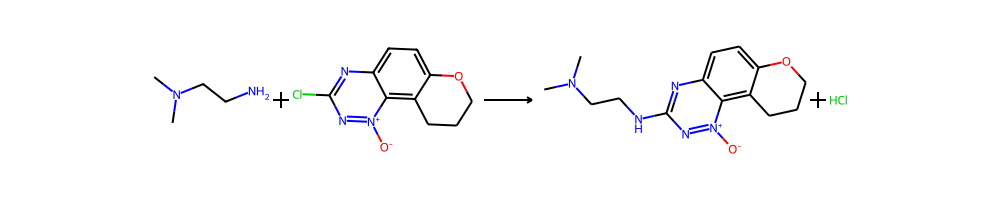

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smi=df.loc[2,'Reaction_smiles']
reaction=AllChem.ReactionFromSmarts(smi,useSmiles=True)
Draw.ReactionToImage(reaction)


In [103]:
isinstance(None,list)

False

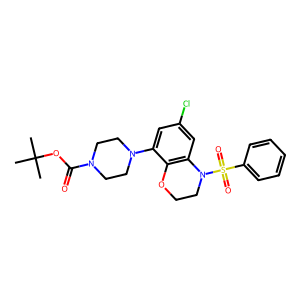

In [102]:
product='CC(C)(C)OC(=O)N1CCN(c2cc(Cl)cc3c2OCCN3S(=O)(=O)c2ccccc2)CC1'
mol=Chem.MolFromSmiles(product)
Draw.MolToImage(mol)

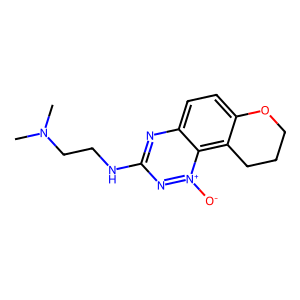

In [10]:
product=df.loc[2,'Decoy_smiles']
mol=Chem.MolFromSmiles(product)
Draw.MolToImage(mol)

In [17]:
len_i=0
for i in data[0]['reactions'].split('>>')[1].split('.'):
    if len(i) > len_i:
        len_i=len(i)
        reactant=i
        

In [23]:
product_lst_main=[]
for i in range(len(data)):
    len_j=0
    for j in data[i]['reactions'].split('>>')[1].split('.'):
        if len(j) > len_j:
            len_j=len(j)
            product_smi=j
    product_lst_main.append(product_smi)

In [33]:
product_lst_decoy=[]
lst_failed=[]
idx=[m for m in range(len(data))]
for i in range(len(data)):
    len_j=0
    try:
        for j in data[i]['positive_reactions'].split('>>')[1].split('.'):
            if len(j) > len_j:
                len_j=len(j)
                product_smi=j
    except:
        lst_failed.append(i)
    product_lst_decoy.append(product_smi)
idx_updated=[i for i in idx if i not in lst_failed ]

In [34]:
len(idx_updated)

34324

In [126]:
data[50]

{'R-id': 5875,
 'class': [6],
 'reactions': 'Cc1nc2c(nc1N(C)C(C)C)OCCN(C(=O)OC(C)(C)C)C2.O>>CC(C)(C)OC(=O)O.Cc1nc2c(nc1N(C)C(C)C)OCCNC2',
 'positive_reactions': 'Cc1nc2c(nc1N(C)C(C)C)OCCN(C(=O)OC(C)(C)C)C2.O>>CC(C)(C)OC(=O)O.Cc1nc2c(nc1N(C)C(C)C)OCCNC2',
 'negative_reactions': ['Cc1nc2c(nc1N(C)C(C)C)OCCN(C(=O)OC(C)(C)C)C2.O>>Cc1nc(CO)c(OCCNC(=O)OC(C)(C)C)nc1N(C)C(C)C',
  'Cc1nc2c(nc1N(C)C(C)C)OCCN(C(=O)OC(C)(C)C)C2.O>>Cc1nc(CNC(=O)OC(C)(C)C)c(OCCO)nc1N(C)C(C)C',
  'Cc1nc2c(nc1N(C)C(C)C)OCCN(C(=O)OC(C)(C)C)C2.O>>CNC(C)C.Cc1nc2c(nc1O)OCCN(C(=O)OC(C)(C)C)C2',
  'Cc1nc2c(nc1N(C)C(C)C)OCCN(C(=O)OC(C)(C)C)C2.O>>CO.Cc1nc2c(nc1NC(C)C)OCCN(C(=O)OC(C)(C)C)C2',
  'Cc1nc2c(nc1N(C)C(C)C)OCCN(C(=O)OC(C)(C)C)C2.O>>CC(C)O.CNc1nc2c(nc1C)CN(C(=O)OC(C)(C)C)CCO2']}

In [117]:
with open('/home/labhhc2/Documents/workspace/D20/Ngoc/scscore/data/result.json','rb') as f:
    df=json.load(f)


In [125]:
df[50]

{'reaction': {'CC(C)(C)OC(=O)O': 1.2434125295909157,
  'Cc1nc2c(nc1N(C)C(C)C)OCCNC2': 3.8237793125264354},
 'decoy1': {'Cc1nc(CO)c(OCCNC(=O)OC(C)(C)C)nc1N(C)C(C)C': 3.2439878529417694},
 'decoy2': {'Cc1nc(CNC(=O)OC(C)(C)C)c(OCCO)nc1N(C)C(C)C': 3.4945857741693267},
 'decoy3': {'CNC(C)C': 1.4283103342086334,
  'Cc1nc2c(nc1O)OCCN(C(=O)OC(C)(C)C)C2': 2.8169948007627292},
 'decoy4': {'CO': 1.0000412309570192,
  'Cc1nc2c(nc1NC(C)C)OCCN(C(=O)OC(C)(C)C)C2': 3.0748969656237994},
 'decoy5': {'CC(C)O': 1.0023770108725476,
  'CNc1nc2c(nc1C)CN(C(=O)OC(C)(C)C)CCO2': 2.9401805659424047}}